In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/SANDY/Desktop/DATA ANALYSIS FILES - JULY 2024/PROJECT 19 - USING PYHTON [BRAZIL FOREST FIRES]/amazon.csv", encoding="iso-8859-1")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,01-01-1998
1,1999,Acre,Janeiro,0.0,01-01-1999
2,2000,Acre,Janeiro,0.0,01-01-2000
3,2001,Acre,Janeiro,0.0,01-01-2001
4,2002,Acre,Janeiro,0.0,01-01-2002


In [5]:
df.dtypes
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

1. Display Top 5 Rows of The Dataset


In [7]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


2. Check Last 5 Rows


In [8]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [7]:
df.shape
print("No of rows: ", df.shape[0])
print("No of columns: ", df.shape[1])

No of rows:  6454
No of columns:  5


4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


5. Check For Duplicate Data and Drop Them


In [8]:
df.drop_duplicates(inplace=True)

6. Check Null Values In The Dataset


In [9]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

7. Get Overall Statistics About The Dataframe


In [10]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


8. Rename Month Names To English

In [12]:
df.head(2)
df.rename(columns={"month":"English"}, inplace=True)

In [51]:
df.head(2)

,year,state,English,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01


9. Total Number of Fires Registered


In [17]:
df.columns
#df[df["number"] != 0]["number"].count()
df["number"].count()

np.int64(6422)

10. In Which Month Maximum Number of Forest Fires Were Reported?


In [16]:
df.columns
df["month_name"] = df["English"].map({"Janeiro":"Jan",
                                      "Fevereiro":"Feb",
                                      "Março":"Mar",
                                      "Abril":"Apr",
                                      "Maio":"May",
                                      "Junho":"Jun",
                                      "Julho":"Jul",
                                      "Agosto":"Aug",
                                      "Setembro":"Sep",
                                      "Outubro":"Oct",
                                      "Novembro":"Nov",
                                      "Dezembro":"Dec"})

In [17]:
df.head(2)

,year,state,English,number,date,month_name
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan


In [22]:
df.head(2)
gb = df.groupby("month_name").agg({"number":"sum"}).sort_values(by="number", ascending=False).reset_index()
gb

,month_name,number
0,Jul,92319.113
1,Oct,88681.579
2,Aug,88050.435
3,Nov,85508.054
4,Sep,58578.305
5,Dec,57535.480
6,Jun,55997.675
7,Jan,47681.844
8,May,34725.363
9,Feb,30839.050


C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\1407142387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month_name", y="number", data=gb, palette="GnBu")


<Axes: xlabel='month_name', ylabel='number'>

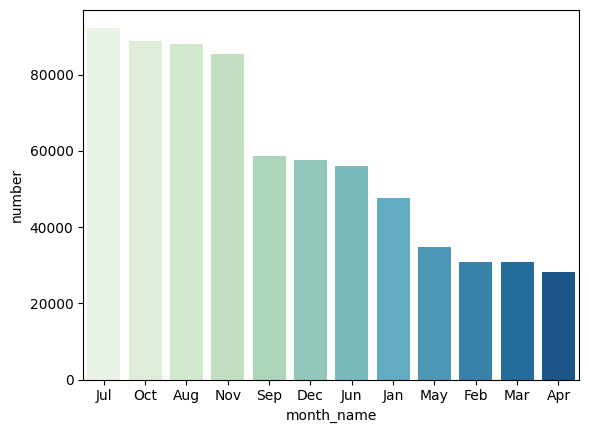

In [23]:
sns.barplot(x="month_name", y="number", data=gb, palette="GnBu")

11. In Which Year Maximum Number of Forest Fires Was Reported?


In [32]:
gb1 = df.groupby("year").agg({"number":"sum"}).sort_values(by="number", ascending=False).reset_index()
gb1.head()

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183


C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\1137886359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb1, x="year", y="number", palette="GnBu")


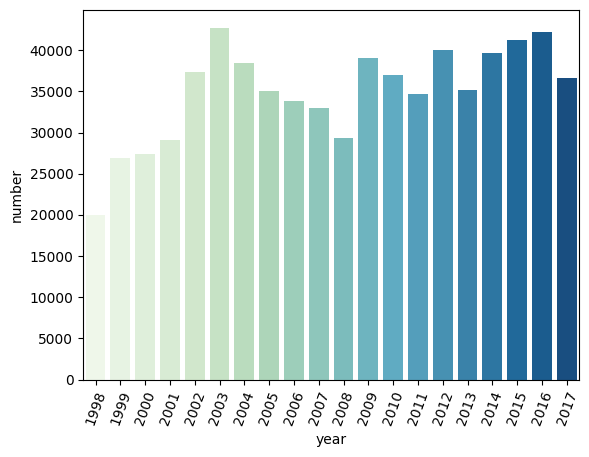

In [33]:
sns.barplot(data=gb1, x="year", y="number", palette="GnBu")
plt.xticks(rotation=70)
plt.show()

12. In Which State Maximum Number of Forest Fires Was Reported?


In [24]:
df.columns
gb2 = df.groupby("state").agg({"number":"sum"}).sort_values(by="number", ascending=False).reset_index()
gb2.head(1)

,state,number
0,Mato Grosso,96246.028


C:\Users\SANDY\AppData\Local\Temp\ipykernel_8132\891774438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb2, x="state", y="number", palette="GnBu")


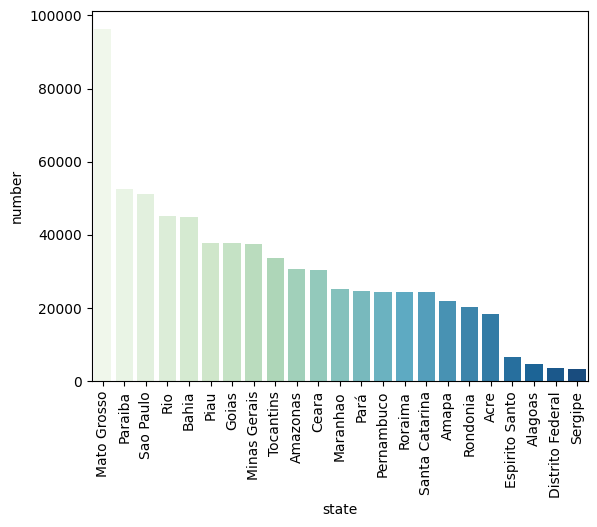

In [25]:
sns.barplot(data=gb2, x="state", y="number", palette="GnBu")
plt.xticks(rotation=90)
plt.show()

13. Find Total Number of Fires Were Reported In Amazonas


In [34]:
df.head(2)
df[df["state"]=="Amazonas"]["number"].sum()

np.float64(30650.129)

14. Display Number of Fires Were Reported In Amazonas (Year-Wise)


In [36]:
df1 = df[df["state"]=="Amazonas"]
df1
gb3 = df1.groupby("year").agg({"number":"sum"}).reset_index()
gb3.head()

,year,number
0,1998,946.0
1,1999,1061.0
2,2000,853.0
3,2001,1297.0
4,2002,2852.0


C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\4118077493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb3, x="year", y="number", palette="GnBu")


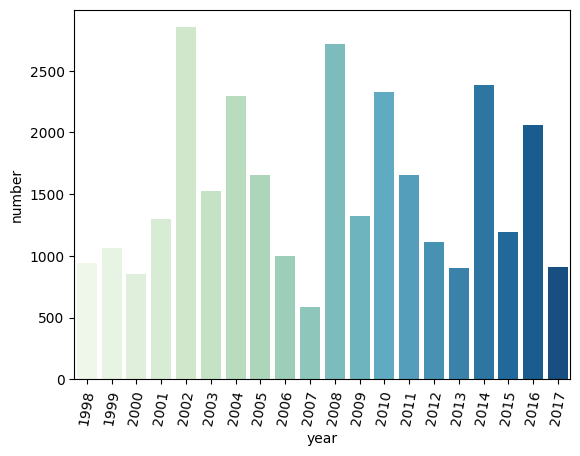

In [37]:
sns.barplot(data=gb3, x="year", y="number", palette="GnBu")
plt.xticks(rotation=80)
plt.show()

15. Display Number of Fires Were Reported In Amazonas (Day-Wise)


In [38]:
df.head(2)
df1["day"] = df["date"].dt.day_of_week
gb4 = df1.groupby("day").agg({"number":"sum"})
gb4

C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\48822451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["day"] = df["date"].dt.day_of_week


,number
day,
0,1886.601
1,6474.217
2,3910.177
3,5754.802
4,5446.480
5,4162.666
6,3015.186


In [39]:
import calendar

gb4.index = [calendar.day_name[x] for x in range(0,7)]
gb4 = gb4.reset_index()
#gb4.drop(["level_0", "index"], axis=1, inplace=True)
gb4

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\2065217058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb4, x="index", y="number", palette="GnBu")


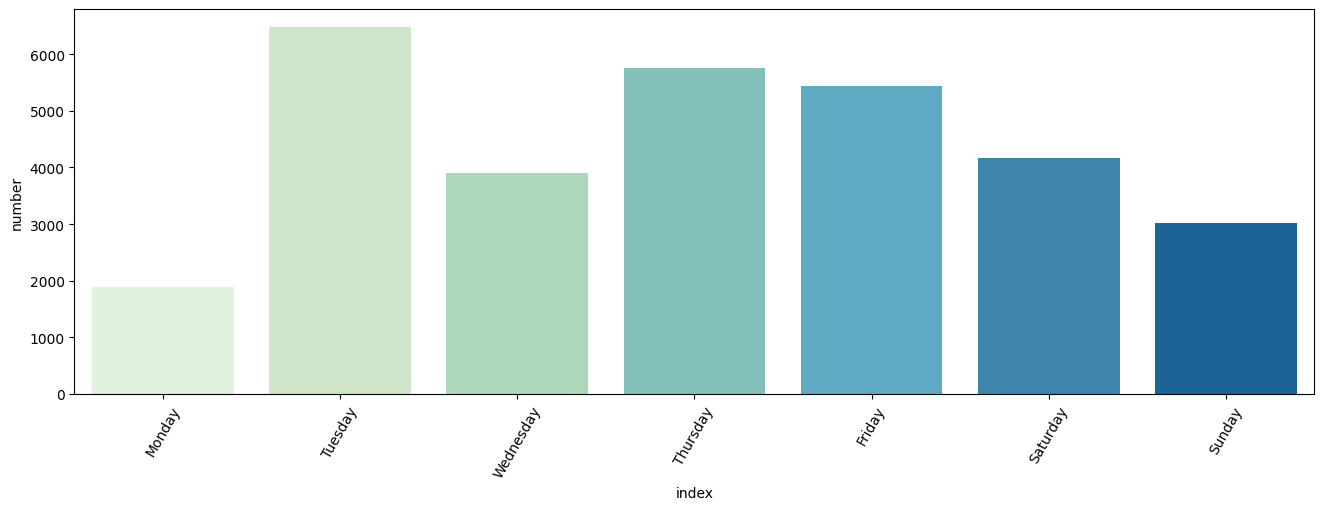

In [40]:
plt.figure(figsize=(16,5))
sns.barplot(data=gb4, x="index", y="number", palette="GnBu")
plt.xticks(rotation=60)
plt.show()

16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [41]:
df.head(2)
df2 = df[df["year"]==2015]
gb5 = df2.groupby("month_name").agg({"number":"sum"}).reset_index()
gb5

,month_name,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,Jul,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


C:\Users\SANDY\AppData\Local\Temp\ipykernel_16980\2983661068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb5, x="month_name", y="number", palette="GnBu")


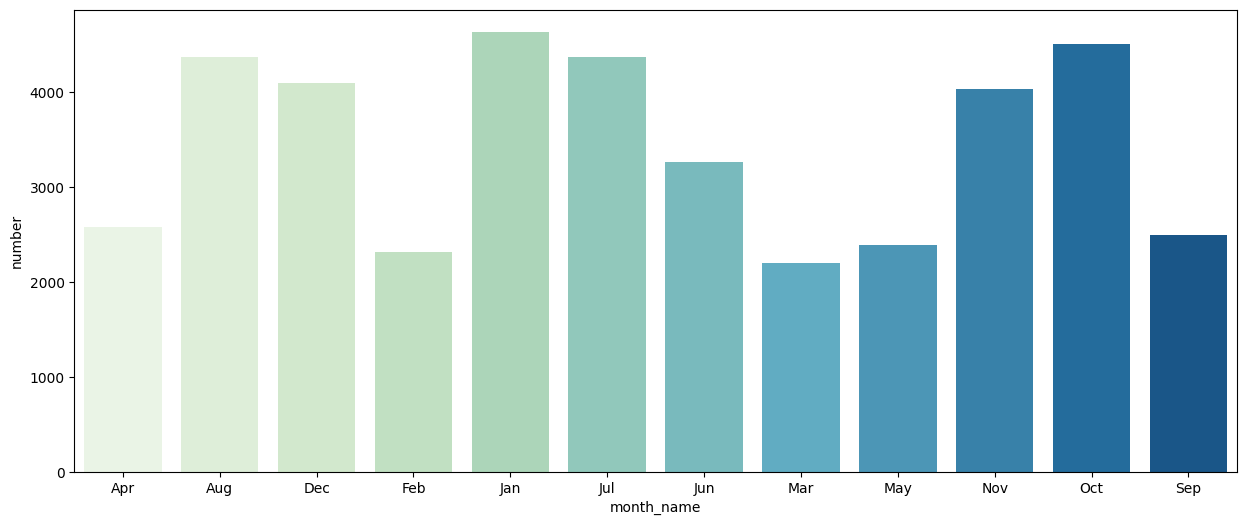

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(data=gb5, x="month_name", y="number", palette="GnBu")
plt.show()

17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [50]:
df.columns
gb6 = df.groupby("state").agg({"number":"mean"}).sort_values(by="number", ascending=False).reset_index()
gb6["number"] = gb6["number"].round(2)
gb6

,state,number
0,Sao Paulo,213.90
1,Mato Grosso,203.48
2,Bahia,187.22
3,Piau,158.17
4,Goias,157.72
5,Minas Gerais,156.80
6,Tocantins,141.04
7,Amazonas,128.24
8,Ceara,127.31
9,Paraiba,111.07


C:\Users\SANDY\AppData\Local\Temp\ipykernel_8132\929056432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb6, x="state", y="number", palette="GnBu")


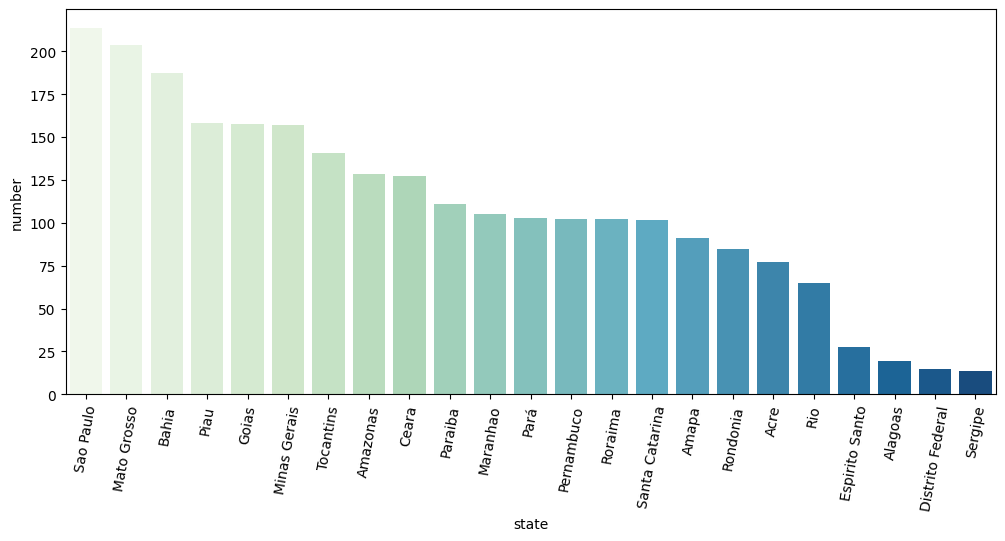

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(data=gb6, x="state", y="number", palette="GnBu")
plt.xticks(rotation=80)
plt.show()

18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [59]:
df.head(2)
#df[df["month_name"]=="Dec"]["state"].unique()
df[df["month_name"]=="Dec"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)